<a href="https://colab.research.google.com/github/HyeJeongIm/AI_HUB_yangjae/blob/main/week1/image/0708_Fashion_MNIST_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np # 이미지는 배열입니다.
import matplotlib.pyplot as plt

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [19]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28)
(10000, 28, 28)


In [20]:
train_X[0].shape

(28, 28)

In [21]:
type(train_X[0])

numpy.ndarray

In [22]:
# class의 유형 몇 개인지 확인
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [23]:
# 클래스의 순서대로 해당되는 의류 카테고리의 이름입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

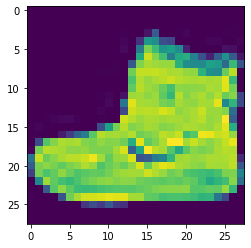

In [24]:
# 첫 번쨰 이미지가 어떤 형태인지 확인
plt.imshow(train_X[0])

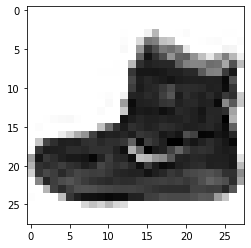

In [25]:
# 첫 번쨰 이미지가 어떤 형태인지 확인
plt.imshow(train_X[0], cmap = plt.cm.binary)

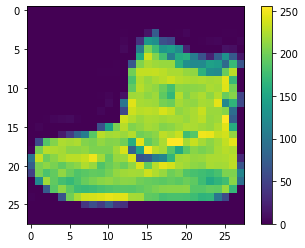

In [26]:
# colorbar 함수를 통해 다른 방식으로 이미지 출력 
# 픽셀의 색상이 검을색에 가까울수록 -> 밝게 나타남 / 흰색에 가까울 수록 -> 어둡게 표현됨
plt.figure()
plt.imshow(train_X[0])
plt.colorbar()
plt.grid(False)
plt.show()

(array([0.04739396, 0.00062525, 0.00037515, 0.00037515, 0.0005002 ,
        0.00087535, 0.0010004 , 0.00112545, 0.0002501 , 0.00062525,
        0.00062525, 0.0007503 , 0.0007503 , 0.00037515, 0.0005002 ,
        0.0010004 , 0.00162565, 0.00262605, 0.0037515 , 0.0037515 ,
        0.0085034 , 0.0117547 , 0.00487695, 0.00237595, 0.00162565]),
 array([  0. ,  10.2,  20.4,  30.6,  40.8,  51. ,  61.2,  71.4,  81.6,
         91.8, 102. , 112.2, 122.4, 132.6, 142.8, 153. , 163.2, 173.4,
        183.6, 193.8, 204. , 214.2, 224.4, 234.6, 244.8, 255. ]),
 <a list of 25 Patch objects>)

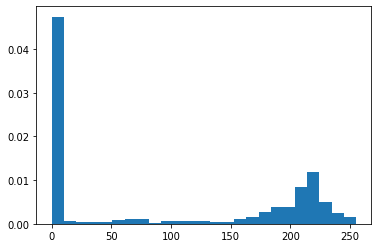

In [27]:
# 하나의 이미지의 크기는 28 x 28 이며 784개의 픽셀에 대해서 색상값을 어떻게 갖는지 살펴보겠습니다. 
color_value = []

for i in range(train_X[0].shape[0]):
  for j in range(train_X[0].shape[1]):
    color_value.append(train_X[0][i][j])

plt.hist(color_value, bins = 25, density = True)

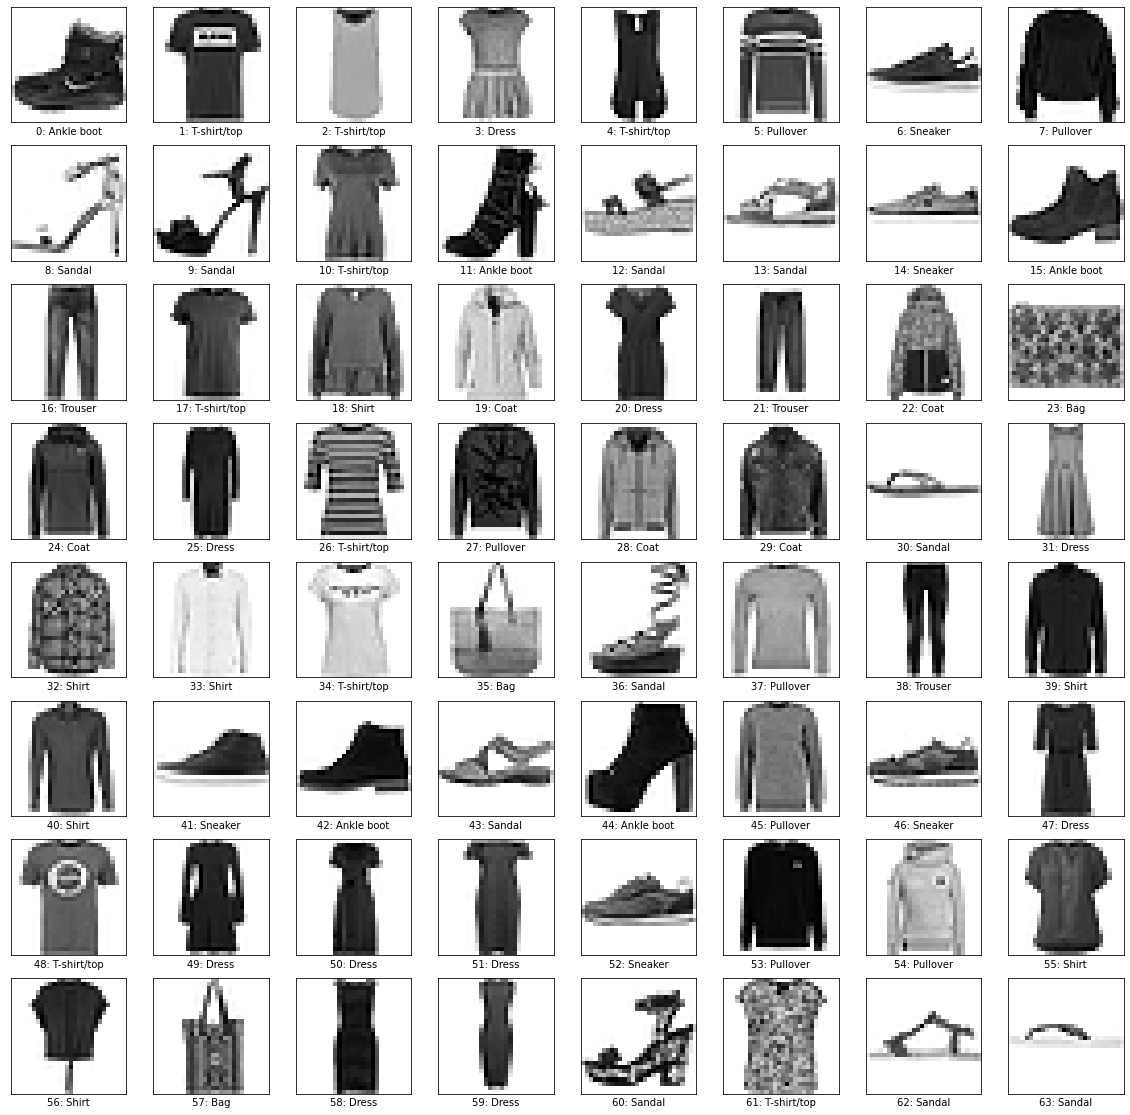

In [28]:
# 예시로 64개의 이미지를 8x8 형태로 출력해봅니다.
plt.figure(figsize = (20, 20))

for i in range(64):
  plt.subplot(8, 8, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(train_X[i], cmap=plt.cm.binary) #camp = plt.cm.binary 옵션으로 이미지를 회색으로 출력합니다.
  plt.xlabel(str(i)+': '+class_names[train_y[i]]) # 각 의류이미지가 어느 카테고리에 해당되는지 라벨링하여 출력합니다.
plt.show()

# CNN 없이 수행하는 이미지 분류 알고리즘 

In [29]:
# 다층 퍼셉트론 MLP 를 사용하여 분류 작업을 수행하도록 하겠습니다. 

In [30]:
# 입력 데이터를 0 ~ 1 사이의 값으로 normalization 해줍니다.
print(np.min(train_X[0]))
print(np.max(train_X[0]))

train_X = train_X / np.max(train_X[0])
test_X = test_X / np.max(train_X[0])

0
255


In [31]:
# 3개의 hidden layer 로 구성되었으며, ReLU를 사용합니다.
# Dropout을 추가해줍니다. 

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

def make_model():

  model = Sequential()
  model.add(Flatten(input_shape = (28, 28)))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.3))

  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dropout(0.3))

  model.add(Dense(64))
  model.add(Activation('relu'))

  model.add(Dense(10))
  model.add(Activation('softmax'))

  return model

model = make_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [32]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [33]:
history = model.fit(train_X, train_y, validation_data = ( test_X, test_y), batch_size = 64, epochs = 20)

Epoch 1/20
938/938 [==============================] - 10s 10ms/step - loss: 0.5608 - accuracy: 0.7957 - val_loss: 62.7772 - val_accuracy: 0.8244
Epoch 2/20
938/938 [==============================] - 11s 11ms/step - loss: 0.4168 - accuracy: 0.8489 - val_loss: 47.5903 - val_accuracy: 0.8425
Epoch 3/20
938/938 [==============================] - 10s 11ms/step - loss: 0.3806 - accuracy: 0.8603 - val_loss: 59.7015 - val_accuracy: 0.8308
Epoch 4/20
938/938 [==============================] - 11s 12ms/step - loss: 0.3606 - accuracy: 0.8680 - val_loss: 48.0714 - val_accuracy: 0.8593
Epoch 5/20
938/938 [==============================] - 10s 11ms/step - loss: 0.3474 - accuracy: 0.8730 - val_loss: 50.2795 - val_accuracy: 0.8548
Epoch 6/20
938/938 [==============================] - 10s 10ms/step - loss: 0.3300 - accuracy: 0.8781 - val_loss: 44.2460 - val_accuracy: 0.8525
Epoch 7/20
938/938 [==============================] - 10s 11ms/step - loss: 0.3217 - accuracy: 0.8803 - val_loss: 45.2091 - val_ac

In [34]:
# CNN을 사용하지 않고 MLP 만으로도 분류가 꽤 잘 이루어짐을 알 수 있습니다. 

In [38]:
test_loss, test_acc = model.evaluate(test_X, test_y)
print("Test accuracy: %f" % (test_acc*100))

313/313 [==============================] - 1s 3ms/step - loss: 49.3605 - accuracy: 0.8547
Test accuracy: 85.470003
